In [1]:
%matplotlib inline 
import numpy as np
import math
import csv
from sklearn import svm
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
def readData(fileName):
    """
    Reads in a csv file and returns the header and a list of all the data
    """
    data = []
    
    with open(fileName, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        header = next(reader)
        
        for row in reader:
            
            data.append(map(lambda x: int(x), row))
    
    return header, data

In [3]:
def pickPoints(data):
    """
    Takes in a list of data, returns a sample of 10% of the data
    """
    chosen = []
    size = len(data)
    k = max(1, size // 10)
    while len(chosen) < k:
        num = int(np.random.uniform()*size)
        if num not in chosen:
            chosen.append(num)
    return chosen

In [4]:
def splitData(data, tIndex, rIndex):
    """
    Takes in a list of data, indices of data to be split off into the testing suite, and index of the response variable
    Returns four data lists:
        List of training set predictors
        List of training set responses
        List of testing set predictors
        List of testing set responses
    """
    training = []
    testing = []
    rTraining = []
    rTesting = []
    
    for row in range(len(data)):
        if row in tIndex:
            rTesting.append(data[row][rIndex])
            testing.append(data[row][:rIndex] + data[row][rIndex+1:])
        else:
            rTraining.append(data[row][rIndex])
            training.append(data[row][:rIndex] + data[row][rIndex+1:])
    return training, rTraining, testing, rTesting
    

In [5]:
def createOLSModel(data, testSet):
    """
    Creates a model with ordinary least squares.  Data is the data dictionary, testSet is the list of k indicies to leave out.
    
    Returns an array of coefficients.
    """
    
    ### Load data into numpy array
    
    ### np.linalg.lstsq
    
    ### return coefficient array
    
    pass
    

In [6]:
def crossValidate(data, coefficients, testSet):
    """
    Finds total error with cross validation.  Data is the entire data dictionary, coefficients is the coefficient vector
    generated by creating the model, testSet is the set of k values (as indicies for data) that was left out.
    
    Returns the total error from cross validating
    """
    totalError = 0
    for k in testSet:
        totalError += 1
        ### Create model estimate by multiplying coefficient vector with data vector
        
        ### Calculate squared error from 'quality' field in data and result of model estimate
        
        ### Add squared error to total error
        
    return totalError

In [7]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print(preprocessing.normalize(a))
print(preprocessing.normalize(a, axis=0))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 0.26726124  0.53452248  0.80178373]
 [ 0.45584231  0.56980288  0.68376346]
 [ 0.50257071  0.57436653  0.64616234]]
[[ 0.12309149  0.20739034  0.26726124]
 [ 0.49236596  0.51847585  0.53452248]
 [ 0.86164044  0.82956136  0.80178373]]


/share/instsww/anaconda/envs/cs186/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
/share/instsww/anaconda/envs/cs186/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


# Part 2

In [20]:
### Load Data ###

### Constants ###
CHANNEL = 'Channel'
REGION = 'Region'
FRESH = 'Fresh'
MILK = 'Milk'
GROCERY = 'Grocery'
FROZEN = 'Frozen'
DETERGENTS_PAPER = 'Detergents_Paper'
DELICASSEN = 'Delicassen'

predictors = [FRESH, MILK, GROCERY, FROZEN, DETERGENTS_PAPER, DELICASSEN]
response = CHANNEL

### Read data ###

fileName = "wholesale-customers.csv"
header, wholeData = readData(fileName)

### Split data into training and testing sets ###

rIndex = header.index(response)
chosen = pickPoints(wholeData)
training, rTraining, testing, rTesting = splitData(wholeData, chosen, rIndex)

### Change response values, 1 => 1, 2 => -1 ###

rTraining = map(lambda x: -1 if x == 2 else 1, rTraining)
rTesting = map(lambda x: -1 if x == 2 else 1, rTesting)

### Normalize features ###

normTrain = preprocessing.normalize(np.array(training), axis=0)
normTest = preprocessing.normalize(np.array(testing), axis=0)

print(np.array(training))
print(np.array(normTrain))

[[    3 12669  9656 ...,   214  2674  1338]
 [    3  7057  9810 ...,  1762  3293  1776]
 [    3  6353  8808 ...,  2405  3516  7844]
 ..., 
 [    3 14531 15488 ...,   437 14841  1867]
 [    3 10290  1981 ...,  1038   168  2125]
 [    3  2787  1698 ...,    65   477    52]]
[[ 0.05624451  0.03767621  0.05215889 ...,  0.00183609  0.02429873
   0.02036776]
 [ 0.05624451  0.02098674  0.05299075 ...,  0.01511769  0.0299236
   0.02703524]
 [ 0.05624451  0.01889312  0.04757824 ...,  0.02063453  0.03195001
   0.11940564]
 ..., 
 [ 0.05624451  0.0432136   0.08366164 ...,  0.00374939  0.13486068
   0.02842049]
 [ 0.05624451  0.03060133  0.01070078 ...,  0.00890588  0.00152662
   0.03234791]
 [ 0.05624451  0.00828823  0.0091721  ...,  0.00055769  0.00433452
   0.00079157]]


/share/instsww/anaconda/envs/cs186/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
/share/instsww/anaconda/envs/cs186/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


In [21]:
### Linear SVM ###

tuning = [x/100.0 for x in range(1,1000)]
lCoefficients = []
lErrors = []

num = 0
for l in tuning:
    if num % 100 == 0:
        print("training with lambda = " + str(l))
    clf = svm.SVC(kernel='linear', C=l, cache_size=500)
    clf.fit(normTrain, np.array(rTraining))
    
    lCoefficients.append(clf.coef_)
    lErrors.append(1 - clf.score(normTest, np.array(rTesting)))
    num += 1
    
# for l in range(len(tuning)):
#     print("With lambda = " + str(tuning[l]) + ", obtained: ")
#     print("coefficients: ",)
#     print(coefficients[l])
#     print("accuracy: ",)
#     print(scores[l])
#     print("")

print("done")

training with lambda = 0.01
training with lambda = 1.01
training with lambda = 2.01
training with lambda = 3.01
training with lambda = 4.01
training with lambda = 5.01
training with lambda = 6.01
training with lambda = 7.01
training with lambda = 8.01
training with lambda = 9.01
done


best value = 1.1
error = 0.0454545454545
('coefficient vector:',)
[[-0.09539535  0.8648691  -2.8268121  -4.46154077  1.15693454 -5.84609645
   0.33285948]]


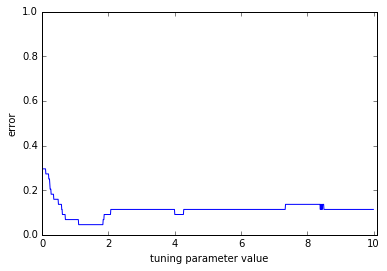

In [22]:
### Display Results ###

best = np.argmin(lErrors)
print("best value = " + str(tuning[best]))
print("error = " + str(lErrors[best]))
print("coefficient vector:",)
print(lCoefficients[best])

plt.xlabel("tuning parameter value")
plt.ylabel('error')
plt.plot(tuning, lErrors)
plt.axis([0,10.1,0,1])
plt.show()

In [23]:
### Polynomial SVM ###

degree = [x/100.0 for x in range(1, 1000)]
pCoefficients = []
pErrors = []

num = 0
for d in degree:
    if num % 100 == 0:
        print("training with degree = " + str(d))
    clf = svm.SVC(kernel='poly', degree=d, cache_size=500)
    clf.fit(normTrain, np.array(rTraining))
    
    pCoefficients.append(clf.dual_coef_)
    pErrors.append(1 - clf.score(normTest, np.array(rTesting)))
    num += 1
    
# for s in range(len(sigma)):
#     print("With sigma = " + str(sigma[s]) + ", obtained: ")
# #     print("coefficients: ",)
# #     print(coefficients[s])
#     print("accuracy: ",)
#     print(scores[s])
#     print("")

print("done")

training with degree = 0.01
training with degree = 1.01
training with degree = 2.01
training with degree = 3.01
training with degree = 4.01
training with degree = 5.01
training with degree = 6.01
training with degree = 7.01
training with degree = 8.01
training with degree = 9.01
done


best value = 1.0
error = 0.272727272727
('coefficient vector: ',)
[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 

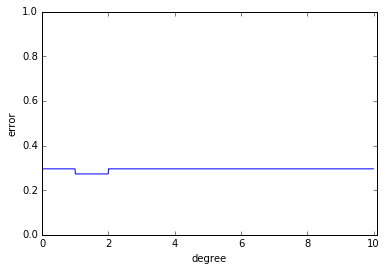

In [27]:
best = np.argmin(pErrors)
print("best value = " + str(degree[best]))
print("error = " + str(pErrors[best]))
print("coefficient vector: ", )
print(pCoefficients[best])

plt.xlabel("degree")
plt.ylabel('error')
plt.plot(degree, pErrors)
plt.axis([0,10.1,0,1])
plt.show()

In [25]:
### Gaussian SVM ###

### rbf kernel = -gamma * ||x-x'||^2 ###

sigma = [x/100.0 for x in range(1,1000)]
gCoefficients = []
gErrors = []

num = 0
for s in sigma:
    if num % 100 == 0:
        print("training with sigma = " + str(s))
    g = 1/(2*s**2)
#     print(g)
    clf = svm.SVC(kernel='rbf', gamma=g, cache_size=500)
    clf.fit(normTrain, np.array(rTraining))
    
    gCoefficients.append(clf.dual_coef_)
    gErrors.append(1 - clf.score(normTest, np.array(rTesting)))
    num += 1
    
# for s in range(len(sigma)):
#     print("With sigma = " + str(sigma[s]) + ", obtained: ")
#     print("coefficients: ",)
#     print(coefficients[s])
#     print("accuracy: ",)
#     print(scores[s])
#     print("")

print("done")

training with sigma = 0.01
training with sigma = 1.01
training with sigma = 2.01
training with sigma = 3.01
training with sigma = 4.01
training with sigma = 5.01
training with sigma = 6.01
training with sigma = 7.01
training with sigma = 8.01
training with sigma = 9.01
done


best value = 0.74
error = 0.0454545454545
('coefficient vector: ',)
[[-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         

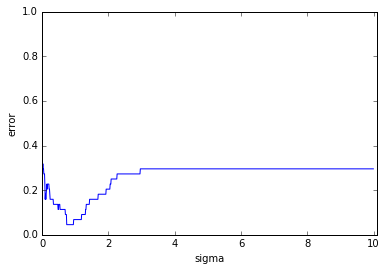

In [28]:
### Display Results ###

best = np.argmin(gErrors)
print("best value = " + str(sigma[best]))
print("error = " + str(gErrors[best]))
print("coefficient vector: ", )
print(gCoefficients[best])

plt.xlabel("sigma")
plt.ylabel('error')
plt.plot(sigma, gErrors)
plt.axis([0,10.1,0,1])
plt.show()